In [1]:
import random

possible_values = []

# Generate random points until you have enough that satisfy the criteria
while len(possible_values) < 100000:  
    p1 = random.randint(0, 1000)
    p2 = random.randint(0, 1000 - p1)
    p3 = 1000 - p1 - p2
    
    possible_values.append((p1 / 1000, p2 / 1000, p3 / 1000))

print(possible_values)


[(0.494, 0.003, 0.503), (0.873, 0.103, 0.024), (0.382, 0.562, 0.056), (0.06, 0.831, 0.109), (0.929, 0.065, 0.006), (0.337, 0.222, 0.441), (0.233, 0.045, 0.722), (0.893, 0.08, 0.027), (0.39, 0.384, 0.226), (0.82, 0.169, 0.011), (0.688, 0.036, 0.276), (0.209, 0.469, 0.322), (0.215, 0.347, 0.438), (0.956, 0.044, 0.0), (0.276, 0.343, 0.381), (0.103, 0.683, 0.214), (0.236, 0.208, 0.556), (0.514, 0.44, 0.046), (0.878, 0.019, 0.103), (0.448, 0.201, 0.351), (0.818, 0.165, 0.017), (0.048, 0.685, 0.267), (0.478, 0.378, 0.144), (0.38, 0.401, 0.219), (0.934, 0.039, 0.027), (0.439, 0.311, 0.25), (0.516, 0.03, 0.454), (0.502, 0.046, 0.452), (0.429, 0.166, 0.405), (0.335, 0.224, 0.441), (0.214, 0.572, 0.214), (0.788, 0.076, 0.136), (0.708, 0.273, 0.019), (0.736, 0.1, 0.164), (0.212, 0.014, 0.774), (0.356, 0.123, 0.521), (0.397, 0.363, 0.24), (0.078, 0.542, 0.38), (0.286, 0.713, 0.001), (0.628, 0.213, 0.159), (0.59, 0.273, 0.137), (0.341, 0.274, 0.385), (0.975, 0.015, 0.01), (0.628, 0.225, 0.147), (0.

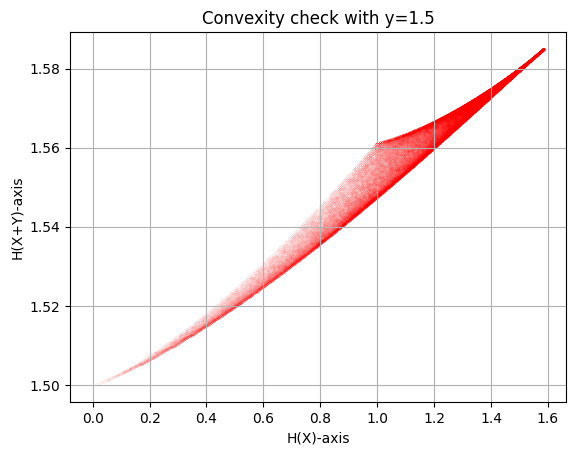

In [2]:
#for 1/3 case, fixed h(y) would be log3
#plot f against x
#spot graph
import matplotlib.pyplot as plt
import math
def h(p1, p2, p3):
    epsilon = 1e-9  # A small value to prevent log(0) issues
    
    if p1 == 0 and p2 == 0 and p3 == 0:
        return 0  # If all probabilities are zero, entropy is zero
    
    # Checking individual probability cases
    if p1 <= epsilon:
        term1 = 0
    else:
        term1 = -p1 * math.log(p1, 2)
        
    if p2 <= epsilon:
        term2 = 0
    else:
        term2 = -p2 * math.log(p2, 2)
        
    if p3 <= epsilon:
        term3 = 0
    else:
        term3 = -p3 * math.log(p3, 2)
    
    x = term1 + term2 + term3
    return x

##############still have to work on how to achieve the minimum value, but this is good progress#########
def get_unique_min_values(x, y):
    # Combine x and y into a dictionary where x-values map to a list of corresponding y-values
    combined_values = {}
    for xi, yi in zip(x, y):
        if xi in combined_values:
            combined_values[xi].append(yi)
        else:
            combined_values[xi] = [yi]
    
    # Find the minimum y-value for each unique x-value
    sorted_keys = sorted(combined_values.keys())
    unique_x = []
    min_y_for_x = []
    for xi in sorted_keys:
        unique_x.append(xi)
        min_y_for_x.append(min(combined_values[xi]))
    
    return unique_x, min_y_for_x

################what is minimum? - minimum distribution 

xentro = []
fentro = []

#equation after convolution (fixed distribution of y)
q1 = 1/4
q2 = 1/4
q3 = 1-q1-q2
y = h(q1,q2,q3)


for i in range(len(possible_values)):
    p1, p2, p3 = possible_values[i]
    
    #equation for h(x)
    x = h(p1,p2,p3)
    
    #probability of convolution
    b1= q1*p1 + q2*p2 + p3*q3
    b2 = q1*p2 + q2*p3 + p1*q3
    b3 = 1-b1-b2

    #equation for  h(x+y)
    f = h(b1,b2,b3)

    xentro.append(x)
    fentro.append(f)

unique_x, min_y_for_x = get_unique_min_values(xentro, fentro)


# Plotting the point
plt.scatter(unique_x, min_y_for_x, color='red', s=0.001)  # Scatter plot for a single point
plt.title(f'Convexity check with y={y}')
plt.xlabel('H(X)-axis')
plt.ylabel('H(X+Y)-axis')
plt.grid(True)
plt.show()



In [3]:
p_values = []

# Generate values for p1, p2, p3 within 2 decimal places
for p1 in range(0, 5001):  # Adjust the range to cover values from 0 to 0.5 with 0.01 increment
    p_values.append(p1 / 10000)  # Divide by 100 to get the decimal representation

print(p_values)


[0.0, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.0011, 0.0012, 0.0013, 0.0014, 0.0015, 0.0016, 0.0017, 0.0018, 0.0019, 0.002, 0.0021, 0.0022, 0.0023, 0.0024, 0.0025, 0.0026, 0.0027, 0.0028, 0.0029, 0.003, 0.0031, 0.0032, 0.0033, 0.0034, 0.0035, 0.0036, 0.0037, 0.0038, 0.0039, 0.004, 0.0041, 0.0042, 0.0043, 0.0044, 0.0045, 0.0046, 0.0047, 0.0048, 0.0049, 0.005, 0.0051, 0.0052, 0.0053, 0.0054, 0.0055, 0.0056, 0.0057, 0.0058, 0.0059, 0.006, 0.0061, 0.0062, 0.0063, 0.0064, 0.0065, 0.0066, 0.0067, 0.0068, 0.0069, 0.007, 0.0071, 0.0072, 0.0073, 0.0074, 0.0075, 0.0076, 0.0077, 0.0078, 0.0079, 0.008, 0.0081, 0.0082, 0.0083, 0.0084, 0.0085, 0.0086, 0.0087, 0.0088, 0.0089, 0.009, 0.0091, 0.0092, 0.0093, 0.0094, 0.0095, 0.0096, 0.0097, 0.0098, 0.0099, 0.01, 0.0101, 0.0102, 0.0103, 0.0104, 0.0105, 0.0106, 0.0107, 0.0108, 0.0109, 0.011, 0.0111, 0.0112, 0.0113, 0.0114, 0.0115, 0.0116, 0.0117, 0.0118, 0.0119, 0.012, 0.0121, 0.0122, 0.0123, 0.0124, 0.0125, 0.0126,

In [4]:
hxentro = []
hfentro = []

for i in range(len(p_values)):
    p1 = p_values[i]
    p2 = p_values[i]
    p3 = 1 - p1 - p2
    
    #equation for h(x)
    x = h(p1,p2,p3)
    
    #probability of convolution
    b1= q1*p1 + q2*p2 + p3*q3
    b2 = q1*p2 + q2*p3 + p1*q3
    b3 = 1-b1-b2

    #equation for  h(x+y)
    f = h(b1,b2,b3)

    # Rounding x to 2 decimal places
    rounded_x = round(x, 5)


    hxentro.append(rounded_x)
    hfentro.append(f)

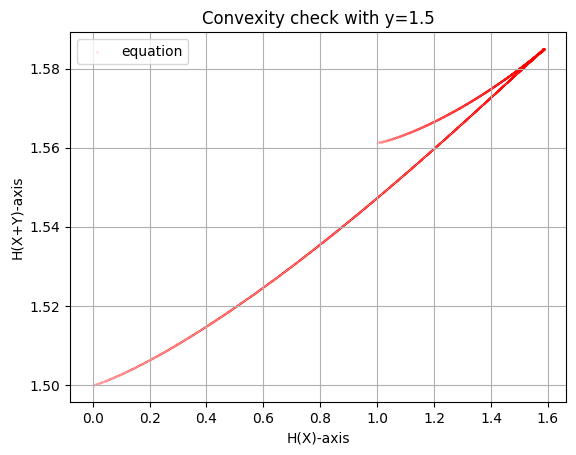

In [5]:
# Plotting the point
plt.scatter(hxentro, hfentro, color='red', s=0.01, label='equation')  # Scatter plot for a single point
plt.title(f'Convexity check with y={y}')
plt.xlabel('H(X)-axis')
plt.ylabel('H(X+Y)-axis')
plt.legend()
plt.grid(True)
plt.show()

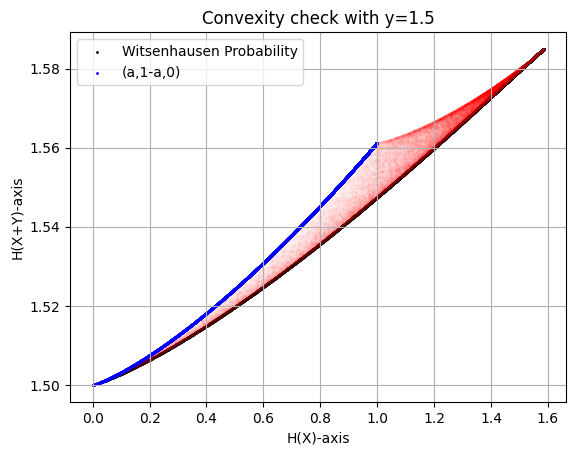

In [6]:
import math
def h(p1, p2, p3):
    epsilon = 1e-9  # A small value to prevent log(0) issues
    
    if p1 == 0 and p2 == 0 and p3 == 0:
        return 0  # If all probabilities are zero, entropy is zero
    
    # Checking individual probability cases
    if p1 <= epsilon:
        term1 = 0
    else:
        term1 = -p1 * math.log(p1, 2)
        
    if p2 <= epsilon:
        term2 = 0
    else:
        term2 = -p2 * math.log(p2, 2)
        
    if p3 <= epsilon:
        term3 = 0
    else:
        term3 = -p3 * math.log(p3, 2)
    
    x = term1 + term2 + term3
    return x

#equation after convolution (fixed distribution of y)
q1 = 1/4
q2 = 1/4
q3 = 1-q1-q2
y = h(q1,q2,q3)

hxentro = []
hfentro = []
xentro = []
fentro = []

kktx = []
kkty = []

# varun distribution (yellow)
for i in range(len(p_values)):
    a1 = p_values[i]
    a2 = 1-p_values[i]
    a3 = 0
    
    #equation for h(x)
    x = h(a1,a2,a3)
    
    #probability of convolution
    b1= q1*a1 + q2*a2 + a3*q3
    b2 = q1*a2 + q2*a3 + a1*q3
    b3 = 1-b1-b2

    #equation for  h(x+y)
    f = h(b1,b2,b3)

    # Rounding x to 2 decimal places
    rounded_x = round(x, 5)
    
    kktx.append(rounded_x)
    kkty.append(f)
    

#minimum of witsen housen probability and maximum when there is 1 small and other big uniform (Red)
for i in range(len(p_values)):
    p1 = p_values[i]
    p2 = p_values[i]
    p3 = 1-p2-p1
    
    if p3 > p2:
    
        #equation for h(x)
        x = h(p1,p2,p3)

        #probability of convolution
        b1= q1*p1 + q2*p2 + p3*q3
        b2 = q1*p2 + q2*p3 + p1*q3
        b3 = 1-b1-b2

        #equation for  h(x+y)
        f = h(b1,b2,b3)

        # Rounding x to 2 decimal places
        rounded_x = round(x, 5)


        hxentro.append(rounded_x)
        hfentro.append(f)

#original data (Red)    
for i in range(len(possible_values)):
    p1, p2, p3 = possible_values[i]
    
    #equation for h(x)
    x = h(p1,p2,p3)
    
    #probability of convolution
    b1= q1*p1 + q2*p2 + p3*q3
    b2 = q1*p2 + q2*p3 + p1*q3
    b3 = 1-b1-b2

    #equation for  h(x+y)
    f = h(b1,b2,b3)

    # Rounding x to 2 decimal places
    rounded_x = round(x, 5)


    xentro.append(rounded_x)
    fentro.append(f)

#unique_x, min_y_for_x = get_unique_min_values(xentro, fentro)

    
# Plotting the point
plt.scatter(hxentro, hfentro, color='black', s=1, label='Witsenhausen Probability')  # Scatter plot for a single point
plt.scatter(xentro, fentro, color='red', s=0.0001)  # Scatter plot for a single point
plt.scatter(kktx, kkty, color='blue', s=1, label = '(a,1-a,0)')  # Scatter plot for a single point
plt.title(f'Convexity check with y={y}')
plt.title(f'Convexity check with y={y}')
plt.xlabel('H(X)-axis')
plt.ylabel('H(X+Y)-axis')
plt.legend()
plt.grid(True)
plt.show()


#can you also plot the z4 so that to make sure that for z4 this is not the minimum?

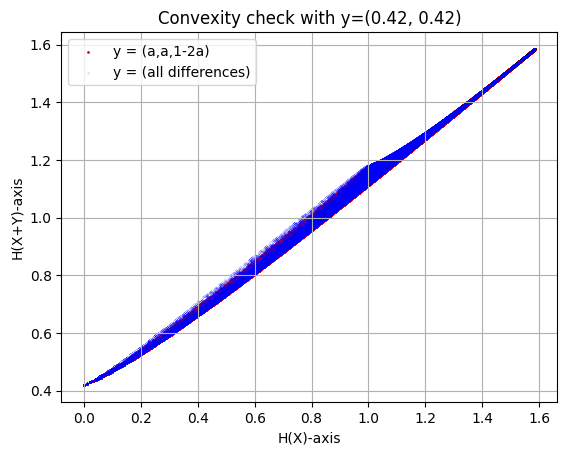

In [130]:
import math
def h(p1, p2, p3):
    epsilon = 1e-9  # A small value to prevent log(0) issues
    
    if p1 == 0 and p2 == 0 and p3 == 0:
        return 0  # If all probabilities are zero, entropy is zero
    
    # Checking individual probability cases
    if p1 <= epsilon:
        term1 = 0
    else:
        term1 = -p1 * math.log(p1, 2)
        
    if p2 <= epsilon:
        term2 = 0
    else:
        term2 = -p2 * math.log(p2, 2)
        
    if p3 <= epsilon:
        term3 = 0
    else:
        term3 = -p3 * math.log(p3, 2)
    
    x = term1 + term2 + term3
    return x



#equation after convolution (fixed distribution of y) Varun 
q1 = 1/6
q2 = 5/6
q3 = 1-q1-q2
y = h(q1,q2,q3)

#equation after convolution (fixed distribution of y) Witsenhuasen
c1 = 1/30
c2 = 1/30
c3 = 1-c1-c2
c = h(c1,c2,c3)

hxentro = []
hfentro = []
xentro = []
fentro = []
kktx = []
kkty = []

# varun distribution (yellow)
for i in range(len(p_values)):
    a1 = p_values[i]
    a2 = 1-p_values[i]
    a3 = 0
    
    #equation for h(x)
    x = h(a1,a2,a3)
    
    #probability of convolution
    b1= q1*a1 + q2*a2 + a3*q3
    b2 = q1*a2 + q2*a3 + a1*q3
    b3 = 1-b1-b2

    #equation for  h(x+y)
    f = h(b1,b2,b3)

    # Rounding x to 2 decimal places
    rounded_x = round(x, 5)
    
    kktx.append(rounded_x)
    kkty.append(f)
    

#minimum of witsen housen probability and maximum when there is 1 small and other big uniform (Red)
for i in range(len(p_values)):
    p1 = p_values[i]
    p2 = p_values[i]
    p3 = 1-p2-p1
    
    if p3 > p2:
    
        #equation for h(x)
        x = h(p1,p2,p3)

        #probability of convolution
        b1= c1*p1 + c2*p2 + p3*c3
        b2 = c1*p2 + c2*p3 + p1*c3
        b3 = 1-b1-b2

        #equation for  h(x+y)
        f = h(b1,b2,b3)

        # Rounding x to 2 decimal places
        rounded_x = round(x, 5)


        hxentro.append(rounded_x)
        hfentro.append(f)

#original data (Blue)    
for i in range(len(possible_values)):
    p1, p2, p3 = possible_values[i]
    
    #equation for h(x)
    x = h(p1,p2,p3)
    
    #probability of convolution
    b1= q1*p1 + q2*p2 + p3*q3
    b2 = q1*p2 + q2*p3 + p1*q3
    b3 = 1-b1-b2

    #equation for  h(x+y)
    f = h(b1,b2,b3)

    # Rounding x to 2 decimal places
    rounded_x = round(x, 5)


    xentro.append(rounded_x)
    fentro.append(f)

witx = []
wity = []
#original data (Red)    
for i in range(len(possible_values)):
    p1, p2, p3 = possible_values[i]
    
    #equation for h(x)
    x = h(p1,p2,p3)
    
    #probability of convolution
    b1= c1*p1 + c2*p2 + p3*c3
    b2 = c1*p2 + c2*p3 + p1*c3
    b3 = 1-b1-b2

    #equation for  h(x+y)
    f = h(b1,b2,b3)

    # Rounding x to 2 decimal places
    rounded_x = round(x, 5)


    witx.append(rounded_x)
    wity.append(f)
    

#unique_x, min_y_for_x = get_unique_min_values(xentro, fentro)

#equation after convolution (fixed distribution of y) Varun 
a1 = 1/50
a2 = 13.97/15
a3 = 1-a1-a2
a = h(a1,a2,a3)

allx = []
ally = []
#original data (Red)    
for i in range(len(possible_values)):
    p1, p2, p3 = possible_values[i]
    
    #equation for h(x)
    x = h(p1,p2,p3)
    
    #probability of convolution
    b1= a1*p1 + a2*p2 + p3*a3
    b2 = a1*p2 + a2*p3 + p1*a3
    b3 = 1-b1-b2

    #equation for  h(x+y)
    f = h(b1,b2,b3)

    # Rounding x to 2 decimal places
    rounded_x = round(x, 5)


    allx.append(rounded_x)
    ally.append(f)

    
hxentro1 = []
hfentro1 = []
#minimum of witsen housen probability and maximum when there is 1 small and other big uniform (Red)
for i in range(len(p_values)):
    p1 = p_values[i]
    p2 = p_values[i]
    p3 = 1-p2-p1
    
    if p3 > p2:
    
        #equation for h(x)
        x = h(p1,p2,p3)

        #probability of convolution
        b1= q1*p1 + q2*p2 + p3*q3
        b2 = q1*p2 + q2*p3 + p1*q3
        b3 = 1-b1-b2

        #equation for  h(x+y)
        f = h(b1,b2,b3)

        # Rounding x to 2 decimal places
        rounded_x = round(x, 5)

        hxentro.append(rounded_x)
        hfentro.append(f)

    
# Plotting the point
#plt.scatter(hxentro, hfentro, color='black', s=1, label='Witsenhausen Probability')  # Scatter plot for a single point
#plt.scatter(hxentro1, hfentro1, color='black', s=1, label='Witsenhausen Probability in Varun')  
#plt.scatter(xentro, fentro, color='blue', s=0.01, label = 'y = (a,1-a,0)')  # Scatter plot for a single point
#plt.scatter(kktx, kkty, color='orange', s=1, label = '(a,1-a,0)')  # Scatter plot for a single point
plt.scatter(witx, wity, color='red', s=1, label = 'y = (a,a,1-2a)')  # Scatter plot for a single point
plt.scatter(allx, ally, color='blue', s=0.01, label = 'y = (all differences)')  # Scatter plot for a single point
plt.title(f'Convexity check with y={round(a,2) ,round(c,2)}')
plt.xlabel('H(X)-axis')
plt.ylabel('H(X+Y)-axis')
plt.legend()
plt.grid(True)
plt.show()


#can you also plot the z4 so that to make sure that for z4 this is not the minimum?

/var/folders/46/t4j69s5x7fj5m02fy0__9z_40000gn/T/ipykernel_11415/2825560683.py:9: RuntimeWarning: divide by zero encountered in log2
  y1 = -b * np.log2(b) - (1 - b) * np.log2(1 - b)
/var/folders/46/t4j69s5x7fj5m02fy0__9z_40000gn/T/ipykernel_11415/2825560683.py:9: RuntimeWarning: invalid value encountered in multiply
  y1 = -b * np.log2(b) - (1 - b) * np.log2(1 - b)
/var/folders/46/t4j69s5x7fj5m02fy0__9z_40000gn/T/ipykernel_11415/2825560683.py:10: RuntimeWarning: divide by zero encountered in log2
  y2 = -2 * a * np.log2(a) - (1 - 2 * a) * np.log2(1 - 2 * a)
/var/folders/46/t4j69s5x7fj5m02fy0__9z_40000gn/T/ipykernel_11415/2825560683.py:10: RuntimeWarning: invalid value encountered in multiply
  y2 = -2 * a * np.log2(a) - (1 - 2 * a) * np.log2(1 - 2 * a)


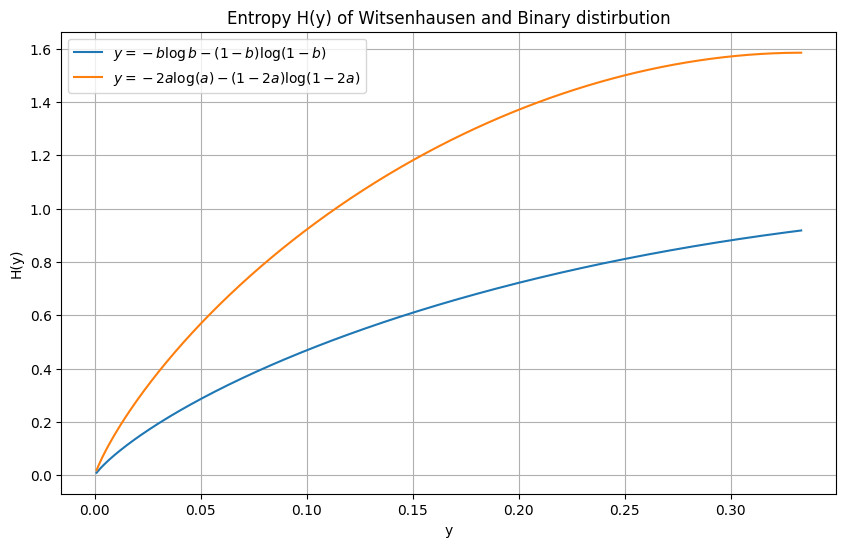

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of b and a values from 0 to 1/3
b = np.linspace(0.0, 1/3, 400)
a = np.linspace(0.0, 1/3, 400)  # Limited to 1/3

# Define the functions
y1 = -b * np.log2(b) - (1 - b) * np.log2(1 - b)
y2 = -2 * a * np.log2(a) - (1 - 2 * a) * np.log2(1 - 2 * a)

# Plot the functions
plt.figure(figsize=(10, 6))
plt.plot(b, y1, label=r'$y = -b \log b - (1 - b) \log(1 - b)$')
plt.plot(a, y2, label=r'$y = -2a \log(a) - (1 - 2a) \log(1 - 2a)$')
plt.xlabel('y')
plt.ylabel('H(y)')
plt.title('Entropy H(y) of Witsenhausen and Binary distirbution')
plt.legend()
plt.grid(True)
plt.show()
